# Load data into Spark DataFrame

In [1]:
from pyspark import SparkContext

In [2]:
import pyspark.sql.functions as F

In [3]:
# We use matplotlib for plotting
import matplotlib.pyplot as plt

# This statement allow to display plot without asking to
%matplotlib inline

In [4]:
df = spark.read.csv('../data/event_ds.csv',header=True).cache()
df

DataFrame[uid: string, event: string, song_id: string, date: string]

In [5]:
df.show()

+---------+-----+--------+----------+
|      uid|event| song_id|      date|
+---------+-----+--------+----------+
|168551310|    P| 7149583|2017-03-30|
|168530479|    P| 1676759|2017-03-30|
|168551509|    P| 6329735|2017-03-30|
|168537509|    P|21237294|2017-03-30|
|168551397|    P| 7149583|2017-03-30|
|168542959|    P| 6124109|2017-03-30|
|168543049|    P|  347730|2017-03-30|
|168551453|    P|19759248|2017-03-30|
|168550382|    P| 3971726|2017-03-30|
|168551453|    P|19759248|2017-03-30|
|168551186|    P| 3045674|2017-03-30|
|168551189|    P|  942999|2017-03-30|
|168543049|    P|  126344|2017-03-30|
|168533577|    P| 1074029|2017-03-30|
|168551522|    P|  150918|2017-03-30|
|168548840|    P|20066194|2017-03-30|
|168549948|    P|23082492|2017-03-30|
|168551442|    P| 1474915|2017-03-30|
|168548211|    P| 4425123|2017-03-30|
|168550208|    P| 3429202|2017-03-30|
+---------+-----+--------+----------+
only showing top 20 rows



In [6]:
# create new or overwrite original field with withColumn
df = df.withColumn('date',F.col('date').cast('date'))
df

DataFrame[uid: string, event: string, song_id: string, date: date]

In [7]:
df.show()

+---------+-----+--------+----------+
|      uid|event| song_id|      date|
+---------+-----+--------+----------+
|168551310|    P| 7149583|2017-03-30|
|168530479|    P| 1676759|2017-03-30|
|168551509|    P| 6329735|2017-03-30|
|168537509|    P|21237294|2017-03-30|
|168551397|    P| 7149583|2017-03-30|
|168542959|    P| 6124109|2017-03-30|
|168543049|    P|  347730|2017-03-30|
|168551453|    P|19759248|2017-03-30|
|168550382|    P| 3971726|2017-03-30|
|168551453|    P|19759248|2017-03-30|
|168551186|    P| 3045674|2017-03-30|
|168551189|    P|  942999|2017-03-30|
|168543049|    P|  126344|2017-03-30|
|168533577|    P| 1074029|2017-03-30|
|168551522|    P|  150918|2017-03-30|
|168548840|    P|20066194|2017-03-30|
|168549948|    P|23082492|2017-03-30|
|168551442|    P| 1474915|2017-03-30|
|168548211|    P| 4425123|2017-03-30|
|168550208|    P| 3429202|2017-03-30|
+---------+-----+--------+----------+
only showing top 20 rows



# Some exploration

In [8]:
# simple count rows
df.count()

12278093

In [9]:
# select operation, count distinct rows
df.select('uid').distinct().count()

59406

In [10]:
# group by aggregation
df.groupBy('event').count().show()

+-----+--------+
|event|   count|
+-----+--------+
|    D|  632607|
|    S|  776071|
|    P|10869415|
+-----+--------+



In [11]:
# group by aggregation, more general (count, min, max, mean), multiple at once
df.groupBy('event').agg(
    F.count(F.col('uid')).alias('count'),
    F.max(F.col('uid')).alias('max_uid')
).show()

+-----+--------+--------+
|event|   count| max_uid|
+-----+--------+--------+
|    D|  632607|99765326|
|    S|  776071|99765326|
|    P|10869415|99996283|
+-----+--------+--------+



In [12]:
# filter operation
# group by aggregation
# order by operation
df.filter((F.col('date')>='2017-04-01') & (F.col('date')<='2017-04-05')) \
                    .groupBy('date','event').count() \
                    .orderBy('date','event').show()

+----------+-----+------+
|      date|event| count|
+----------+-----+------+
|2017-04-01|    D| 31476|
|2017-04-01|    P|478908|
|2017-04-01|    S| 33094|
|2017-04-02|    D| 27075|
|2017-04-02|    P|428756|
|2017-04-02|    S| 30391|
|2017-04-03|    D| 25552|
|2017-04-03|    P|253309|
|2017-04-03|    S| 26213|
|2017-04-04|    D| 19510|
|2017-04-04|    P|385577|
|2017-04-04|    S| 25166|
|2017-04-05|    D| 15788|
|2017-04-05|    P|302208|
|2017-04-05|    S| 20093|
+----------+-----+------+



In [13]:
date_count = df.groupBy('date').count().toPandas()

(array([736419., 736426., 736433., 736440., 736447., 736454., 736461.]),
 <a list of 7 Text xticklabel objects>)

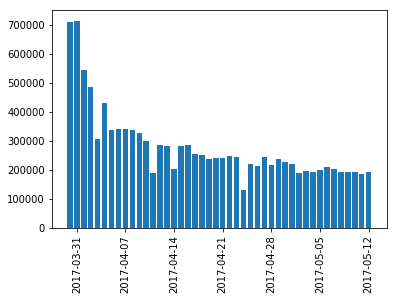

In [14]:
plt.bar(date_count['date'],date_count['count'])
plt.xticks(rotation='vertical')

# Label definition

In [15]:
import datetime
from dateutil import parser

label_window_size = 14
label_window_end_date = parser.parse('2017-05-12').date()
label_window_start_date = label_window_end_date - datetime.timedelta(label_window_size - 1)
print('label window:',label_window_start_date,'~',label_window_end_date,'days:',label_window_size)

feature_window_size = 30
feature_window_end_date = label_window_start_date - datetime.timedelta(1)
feature_window_start_date = feature_window_end_date  - datetime.timedelta(feature_window_size - 1)
print('feature window:',feature_window_start_date,'~',feature_window_end_date,'days:',feature_window_size)

label window: 2017-04-29 ~ 2017-05-12 days: 14
feature window: 2017-03-30 ~ 2017-04-28 days: 30


In [16]:
# all the uid we will model
df_model_uid = df.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))\
                    .select('uid').distinct()
# active in label window (active label=0)
df_active_uid_in_label_window = df.filter((F.col('date')>=label_window_start_date) & (F.col('date')<=label_window_end_date))\
                            .select('uid').distinct().withColumn('label',F.lit(0))

In [17]:
# prepare label data (churn label=1; active label=0)
df_label = df_model_uid.join(df_active_uid_in_label_window,on=['uid'],how='left')
df_label = df_label.fillna(1)

In [18]:
df_label.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1|36063|
|    0|22031|
+-----+-----+



# Feature generation

In [19]:
# event_data in feature_window
df_feature_window = df.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))

### Frequency features

##### method 1

In [20]:
# define a function to generate frequency features
def frequency_feature_generation(df,event,time_window,snapshot_date):
    """
    generate frequency features for one event type and one time window
    """
    df_feature = df.filter(F.col('event')==event)\
            .filter((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date))\
            .groupBy('uid').agg(F.count(F.col('uid')).alias('freq_'+event+'_last_'+str(time_window)))
    return df_feature

In [21]:
# generate one feature
event = 'S'
time_window = 3
snapshot_date = feature_window_end_date
df_feature = frequency_feature_generation(df_feature_window,event,time_window,snapshot_date)

In [22]:
df_feature.show(5)

+---------+-------------+
|      uid|freq_S_last_3|
+---------+-------------+
|167862193|           48|
|167635050|           27|
|168280832|            2|
|169151926|            5|
|168894669|            3|
+---------+-------------+
only showing top 5 rows



In [23]:
# generate frequency features for all event_list, time_window_list
event_list = ['P','D','S']
time_window_list = [1,3,7,14,30]
df_feature_list = []
for event in event_list:
    for time_window in time_window_list:
        df_feature_list.append(frequency_feature_generation(df_feature_window,event,time_window,snapshot_date))


In [24]:
df_feature_list

[DataFrame[uid: string, freq_P_last_1: bigint],
 DataFrame[uid: string, freq_P_last_3: bigint],
 DataFrame[uid: string, freq_P_last_7: bigint],
 DataFrame[uid: string, freq_P_last_14: bigint],
 DataFrame[uid: string, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint],
 DataFrame[uid: string, freq_D_last_3: bigint],
 DataFrame[uid: string, freq_D_last_7: bigint],
 DataFrame[uid: string, freq_D_last_14: bigint],
 DataFrame[uid: string, freq_D_last_30: bigint],
 DataFrame[uid: string, freq_S_last_1: bigint],
 DataFrame[uid: string, freq_S_last_3: bigint],
 DataFrame[uid: string, freq_S_last_7: bigint],
 DataFrame[uid: string, freq_S_last_14: bigint],
 DataFrame[uid: string, freq_S_last_30: bigint]]

##### method 2: too many dfs to join? do it another way

In [25]:
# define a function to generate frequency features for a list of time windows
# using when().otherwise(), and list comprehension trick!
def frequency_feature_generation_time_windows(df,event,time_window_list,snapshot_date):
    """
    generate frequency features for one event type and a list of time windows
    """
    df_feature = df \
        .filter(F.col('event')==event) \
        .groupBy('uid') \
        .agg(*[F.sum(F.when((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date),1).otherwise(0)).alias('freq_'+event+'_last_'+str(time_window)) \
                for time_window in time_window_list]
            )# *[] opens list and make them comma separated
    return df_feature

In [26]:
# generate one event type, all time windows 
event = 'S'
time_window_list = [1,3,7,14,30]
snapshot_date = feature_window_end_date
df_feature = frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date)
df_feature.show(5)

+---------+-------------+-------------+-------------+--------------+--------------+
|      uid|freq_S_last_1|freq_S_last_3|freq_S_last_7|freq_S_last_14|freq_S_last_30|
+---------+-------------+-------------+-------------+--------------+--------------+
|168023090|            0|            0|            0|             1|             3|
|167785178|            0|            0|            0|             0|             6|
|167810312|            0|            0|            6|             9|            19|
|167979122|            0|            0|            0|             0|             7|
|167742880|            0|            0|            0|             0|            11|
+---------+-------------+-------------+-------------+--------------+--------------+
only showing top 5 rows



In [27]:
# generate frequency features for all event_list, time_window_list
event_list = ['P','D','S']
time_window_list = [1,3,7,14,30]
df_feature_list = []
for event in event_list:
    df_feature_list.append(frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date))


In [28]:
df_feature_list

[DataFrame[uid: string, freq_P_last_1: bigint, freq_P_last_3: bigint, freq_P_last_7: bigint, freq_P_last_14: bigint, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint, freq_D_last_3: bigint, freq_D_last_7: bigint, freq_D_last_14: bigint, freq_D_last_30: bigint],
 DataFrame[uid: string, freq_S_last_1: bigint, freq_S_last_3: bigint, freq_S_last_7: bigint, freq_S_last_14: bigint, freq_S_last_30: bigint]]

### Recency features

In [ ]:
# defined as days from last event
# can generate one feature for each type of event


### Profile features

In [29]:
df_play = spark.read.csv('../data/play_ds.csv',header=True)
df_play.show(5)

+---------+------+--------+----------+---------+-----------+
|      uid|device| song_id|      date|play_time|song_length|
+---------+------+--------+----------+---------+-----------+
|168551310|    ar| 7149583|2017-03-30|       29|        215|
|168530479|    ar| 1676759|2017-03-30|      338|        338|
|168551509|    ar| 6329735|2017-03-30|      289|        289|
|168537509|    ar|21237294|2017-03-30|      262|        262|
|168551397|    ar| 7149583|2017-03-30|      215|        215|
+---------+------+--------+----------+---------+-----------+
only showing top 5 rows



In [30]:
df_play_feature_window = df_play.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))
df_profile_tmp = df_play_feature_window.select('uid','device').distinct()

In [31]:
df_profile_tmp.groupBy('device').count().show()

+------+-----+
|device|count|
+------+-----+
|    ar|50657|
|    ip| 7312|
+------+-----+



In [32]:
# check if one user has two devices
df_profile_tmp.count()

57969

In [33]:
df_profile_tmp.distinct().count()

57969

In [34]:
df_profile_tmp = df_profile_tmp.withColumn('device_type',F.when(F.col('device')=='ip',1).otherwise(2))
df_profile_tmp.groupBy('device_type').count().show()

+-----------+-----+
|device_type|count|
+-----------+-----+
|          1| 7312|
|          2|50657|
+-----------+-----+



In [35]:
df_profile = df_label.select('uid').join(df_profile_tmp.select('uid','device_type'),on='uid',how='left')
df_profile.groupBy('device_type').count().show()

+-----------+-----+
|device_type|count|
+-----------+-----+
|       null|  141|
|          1| 7312|
|          2|50657|
+-----------+-----+



### Total play time features

In [ ]:
# Can you generate total song play time features (using play_ds data) for different time window
# using play data (need to clean play time first, play time may be negative in data)


### Fancier frequency features

In [ ]:
# Can you generate counts of songs play 80% of their song length (using play_ds data) for different time window
# using play data (need to clean play time and song length first, play time may be negative in data, song length may be zeros)


# Form training data

In [36]:
def join_feature_data(df_master,df_feature_list):
    for df_feature in df_feature_list:
        df_master = df_master.join(df_feature,on='uid',how='left')
        #df_master.persist() # uncomment if number of joins is too many
    return df_master
    

In [37]:
# join all behavior features
df_model_final = join_feature_data(df_label,df_feature_list)

In [38]:
# join all profile features
df_model_final = join_feature_data(df_model_final,[df_profile])

In [39]:
df_model_final.fillna(0).toPandas().to_csv('../data/df_model_final.csv',index=False)